In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import LSTM, Dense, Input
from keras.models import Model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler


# Any results you write to the current directory are saved as output.

['stores data-set.csv', 'Features data set.csv', 'sales data-set.csv']


In [7]:
store_df = pd.read_csv('../input/stores data-set.csv')
features_df = pd.read_csv('../input/Features data set.csv')
main_df = pd.read_csv('../input/sales data-set.csv')

In [8]:
features_df = features_df.drop(columns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [9]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
main_df['Date'] = pd.to_datetime(main_df['Date'])

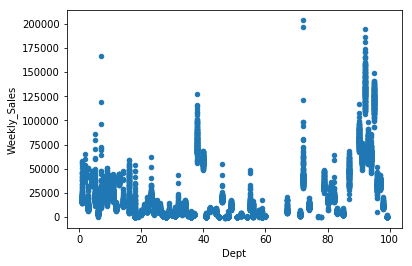

In [10]:
main_df[main_df['Store'] ==1 ].plot.scatter(x = 'Dept', y = 'Weekly_Sales')

In [11]:
print(main_df.head(5))

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False


In [12]:
print(features_df.head(5))

   Store       Date  Temperature    ...             CPI  Unemployment  IsHoliday
0      1 2010-05-02        42.31    ...      211.096358         8.106      False
1      1 2010-12-02        38.51    ...      211.242170         8.106       True
2      1 2010-02-19        39.93    ...      211.289143         8.106      False
3      1 2010-02-26        46.63    ...      211.319643         8.106      False
4      1 2010-05-03        46.50    ...      211.350143         8.106      False

[5 rows x 7 columns]


In [13]:
print(store_df.head(5))

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [14]:
main_df = main_df.merge(store_df)
main_df = main_df.merge(features_df)
main_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


In [15]:
main_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000


In [16]:
main_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [17]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 35.8+ MB


In [18]:
main_df['Label'] = main_df['Weekly_Sales']
main_df = main_df.drop(['Weekly_Sales'], axis = 1) #Sona taşı

In [19]:
main_df.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Label
0,1,1,2010-05-02,False,A,151315,42.31,2.572,211.096358,8.106,24924.50
1,1,2,2010-05-02,False,A,151315,42.31,2.572,211.096358,8.106,50605.27
2,1,3,2010-05-02,False,A,151315,42.31,2.572,211.096358,8.106,13740.12
3,1,4,2010-05-02,False,A,151315,42.31,2.572,211.096358,8.106,39954.04
4,1,5,2010-05-02,False,A,151315,42.31,2.572,211.096358,8.106,32229.38


In [20]:
holiday_enc = LabelEncoder()
type_enc = LabelEncoder()


temp_minmax = MinMaxScaler()
fuel_minmax = MinMaxScaler()
cpi_minmax = MinMaxScaler()
unp_minmax = MinMaxScaler()
size_minmax = MinMaxScaler()


main_df['Temperature'] = temp_minmax.fit_transform(np.array(main_df['Temperature']).reshape(-1,1))
main_df['Fuel_Price'] = fuel_minmax.fit_transform(np.array(main_df['Fuel_Price']).reshape(-1,1))
main_df['CPI'] = cpi_minmax.fit_transform(np.array(main_df['CPI']).reshape(-1,1))
main_df['Unemployment'] = unp_minmax.fit_transform(np.array(main_df['Unemployment']).reshape(-1,1))
main_df['Size'] = size_minmax.fit_transform(np.array(main_df['Size']).reshape(-1,1))


main_df['IsHoliday'] = holiday_enc.fit_transform(main_df['IsHoliday'])
main_df['Type'] = type_enc.fit_transform(main_df['Type'])


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
main_df = main_df.sort_values(by = ['Store','Dept']) # LSTM'de sıralama 
main_df.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Label
0,1,1,2010-05-02,0,0,0.630267,0.434149,0.050100,0.840500,0.405118,24924.50
73,1,1,2010-12-02,1,0,0.630267,0.396967,0.038076,0.841941,0.405118,46039.49
145,1,1,2010-02-19,0,0,0.630267,0.410861,0.021042,0.842405,0.405118,41595.55
218,1,1,2010-02-26,0,0,0.630267,0.476419,0.044589,0.842707,0.405118,19403.54
290,1,1,2010-05-03,0,0,0.630267,0.475147,0.076653,0.843008,0.405118,21827.90


In [22]:
main_df = main_df.drop(['Date'], axis = 1)
#main_df = main_df[['Store','Dept','IsHoliday','Label']] #Sadece Tatil günleri etkisini hesaba katmak istenirse.
main_df = main_df[main_df['Store'] == 1] # 1. Dükkan için deneme
main_df = main_df[main_df['Dept'] == 1]

In [23]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):  # Kodu devşirdim. Yani sıfırdan kendi yazdığım bir kod değil. Veriyi kaydırarak(pd.shift) LSTM için uygun formata getiriyor.
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Past
    for i in range(n_in, 0, -1): # n_in kadar kaydırma gerçekleştiriyor. [t, t-1, t-2 . . .] gibi.
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Future
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [24]:
lstm_df = series_to_supervised(main_df,3)

In [25]:
lstm_df = lstm_df.drop(lstm_df.columns[[-2,-3,-4,-5,-6,-7,-8,-9,-10]], axis = 1)
#lstm_df = lstm_df.drop(lstm_df.columns[[-2,-3,-4]], axis = 1) #Farklı geçiş değerleri için stünler değişkenlik gösterebilir.

In [26]:
np_lstm = np.array(lstm_df)

In [27]:
prop = 0.95

train_X, train_Y = np_lstm[:round(len(np_lstm) * prop), : np_lstm.shape[1] - 1 ], np_lstm[:round(len(np_lstm) * prop), -1 ]
test_X, test_Y = np_lstm[round(len(np_lstm) * prop):, : np_lstm.shape[1] - 1 ], np_lstm[round(len(np_lstm) * prop):, -1 ]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [28]:
inputs = Input(shape=(train_X.shape[1],train_X.shape[2]))

lstm_1 = LSTM(64, activation= 'relu')(inputs)

outputs = Dense(1, activation= 'relu')(lstm_1)

model = Model(inputs = inputs, outputs = outputs)
model.compile(loss='mean_absolute_percentage_error', 
              metrics=['mae'],
              optimizer='Adam')
model.summary()

history = model.fit(x = train_X,
          y=train_Y,
          batch_size = 2,
          epochs = 50,
          validation_data = (test_X, test_Y))


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 24,385
Trainable params: 24,385
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 133 samples, validate on 7 samples
Epoch 1/50
133/133 [==============================] - 3s 19ms/step - loss: 84.5237 - mean_absolute_error: 19152.6319 - val_loss: 68.0528 - val_mean_absolute_error: 15018.1922
Epoch 2/50
133/133 [==============================] - 0s 3ms/st

Epoch 41/50
133/133 [==============================] - 0s 3ms/step - loss: 16.4718 - mean_absolute_error: 4653.6459 - val_loss: 8.0017 - val_mean_absolute_error: 1852.4888
Epoch 42/50
133/133 [==============================] - 0s 3ms/step - loss: 16.5685 - mean_absolute_error: 4645.0402 - val_loss: 10.0773 - val_mean_absolute_error: 2334.5815
Epoch 43/50
133/133 [==============================] - 0s 3ms/step - loss: 16.5331 - mean_absolute_error: 4602.3611 - val_loss: 10.1961 - val_mean_absolute_error: 2361.8524
Epoch 44/50
133/133 [==============================] - 0s 3ms/step - loss: 16.4105 - mean_absolute_error: 4624.6623 - val_loss: 8.9437 - val_mean_absolute_error: 2071.9141
Epoch 45/50
133/133 [==============================] - 0s 3ms/step - loss: 16.3785 - mean_absolute_error: 4566.9409 - val_loss: 8.9728 - val_mean_absolute_error: 2078.1814
Epoch 46/50
133/133 [==============================] - 0s 3ms/step - loss: 16.3928 - mean_absolute_error: 4588.5586 - val_loss: 9.6782 - v

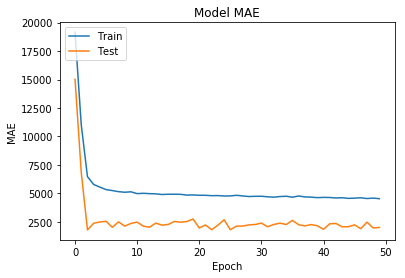

In [36]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

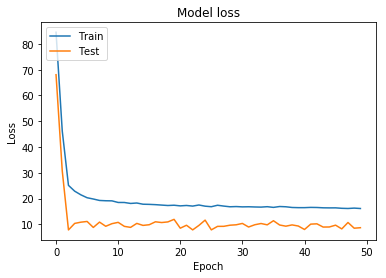

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

{'val_loss': [68.05284990583148,
  30.737799508231028,
  7.833216530936105,
  10.356045995439802,
  10.83750833783831,
  11.114230292184013,
  8.796968187604632,
  10.863453592572894,
  9.244864600045341,
  10.255853380475726,
  10.767263412475586,
  9.212545667375837,
  8.820591654096331,
  10.361654281616211,
  9.585686547415596,
  9.844427381243024,
  10.982830320085798,
  10.696468898228236,
  10.935768808637347,
  11.929834365844727,
  8.504368782043457,
  9.643727847508021,
  7.847789491925921,
  9.582433155604772,
  11.634157589503697,
  7.849576541355678,
  9.208885874067034,
  9.224528176443917,
  9.660330091203962,
  9.821547099522181,
  10.347896712166923,
  8.957792145865303,
  9.83857468196324,
  10.317458425249372,
  9.805735315595355,
  11.395836012704033,
  9.736807141985212,
  9.28351606641497,
  9.775577136448451,
  9.344265120370048,
  8.001705305916923,
  10.077319417681013,
  10.196108136858259,
  8.943678310939244,
  8.972807884216309,
  9.678216661725726,
  8.228